## VERİ ÖN İŞLEME

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
veri2=pd.read_csv("turkey_car_market.csv")

In [3]:
#Tablodaki Sutunlardaki Eksik Verileri Basalım
veri2.isnull().sum()#degiskenlerin sahip oldugu eksik degeelrin toplamını yazar

İlan Tarihi       0
Marka             0
Arac Tip Grubu    0
Arac Tip          0
Model Yıl         0
Yakıt Turu        0
Vites             0
CCM               0
Beygir Gucu       0
Renk              0
Kasa Tipi         0
Kimden            0
Durum             0
Km                0
Fiyat             0
dtype: int64

<AxesSubplot:>

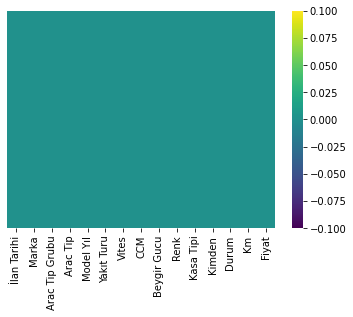

In [4]:
#Hatta Eksik Verileri Görselleştirerek Görelim
sns.heatmap(veri2.isnull(),yticklabels=False,cmap="viridis")# eksik verileri gorsellestirererk gor

In [5]:
ing_sutun_isimleri = ['Ilan_Tarihi','Marka','Arac_Tip_Grubu','Arac_Tip','Model_Yili','Yakit_Turu','Vites','CCM','Beygir_Gucu','Renk','Kasa_Tipi','Kimden','Durum','Km','Fiyat']
veri2.columns = ing_sutun_isimleri
veri2.head(5)

,Ilan_Tarihi,Marka,Arac_Tip_Grubu,Arac_Tip,Model_Yili,Yakit_Turu,Vites,CCM,Beygir_Gucu,Renk,Kasa_Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [6]:
veri2.dtypes

Ilan_Tarihi        object
Marka              object
Arac_Tip_Grubu     object
Arac_Tip           object
Model_Yili        float64
Yakit_Turu         object
Vites              object
CCM                object
Beygir_Gucu        object
Renk               object
Kasa_Tipi          object
Kimden             object
Durum              object
Km                  int64
Fiyat               int64
dtype: object

In [7]:
veri2.drop(["Ilan_Tarihi","Arac_Tip_Grubu","Arac_Tip","Km"],axis=1,inplace=True)

In [8]:
#DALLANMA SAYILARI BU SEKİLDEDİR 
#print(veri.Marka.value_counts())#36
#print(veri.Arac_Tip_Grubu.value_counts())#387
#print(veri.Arac_Tip.value_counts())#1759
#print(veri.Model_Yili.value_counts())#40
#print(veri.Yakit_Turu.value_counts())#5
#print(veri.Vites.value_counts())#3
#print(veri.CCM.value_counts())#15
#print(veri.Beygir_Gucu.value_counts())#19
#print(veri.Renk.value_counts())#28
#print(veri.Kasa_Tipi.value_counts())#13
#print(veri.Kimden.value_counts())#3
#print(veri.Durum.value_counts())#4
#print(veri.Km.value_counts())#1605
#print(veri.Fiyat.value_counts())#1833

In [9]:
#Arac_Tip_Grubu VE Km SUTUNLARINI SİLELİM

In [10]:
Marka=pd.get_dummies(veri2["Marka"],drop_first=True)
Yakit_Turu=pd.get_dummies(veri2["Yakit_Turu"],drop_first=True)
Vites=pd.get_dummies(veri2["Vites"],drop_first=True)
CCM=pd.get_dummies(veri2["CCM"],drop_first=True)
Beygir_Gucu=pd.get_dummies(veri2["Beygir_Gucu"],drop_first=True)
Renk=pd.get_dummies(veri2["Renk"],drop_first=True)
Kasa_Tipi=pd.get_dummies(veri2["Kasa_Tipi"],drop_first=True)
Kimden=pd.get_dummies(veri2["Kimden"],drop_first=True)
Durum=pd.get_dummies(veri2["Durum"],drop_first=True)

In [11]:
veri2.drop(["Marka","Yakit_Turu","Vites","CCM","Beygir_Gucu","Renk","Kasa_Tipi","Kimden","Durum"],axis=1,inplace=True)

In [12]:
veri2=pd.concat([veri2,Marka,Yakit_Turu,Vites,CCM,Beygir_Gucu,Renk,Kasa_Tipi,Kimden,Durum],axis=1)

In [13]:
veri2.dtypes

Model_Yili    float64
Fiyat           int64
Alfa Romeo      uint8
Audi            uint8
BMW             uint8
               ...   
Sahibinden      uint8
Yetkili         uint8
2. El           uint8
Hasarlı         uint8
Klasik          uint8
Length: 119, dtype: object

In [14]:
veri=veri2.copy()
veri.head(1)#ilk 1 satırı yaz

,Model_Yili,Fiyat,Alfa Romeo,Audi,BMW,Chery,Chevrolet,Chrysler,Citroen,Dacia,...,Roadster,Sedan,Spor / Coupe,Station Wagon,Üstü Açık / Cabriolet,Sahibinden,Yetkili,2. El,Hasarlı,Klasik
0,2017.0,634500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## XGBOOST ILE MAKINA OGRENMESI

In [21]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection                                    

In [22]:
y=np.array(veri["Fiyat"])
X=np.array(veri.drop('Fiyat',axis=1))

In [23]:
# Kütüphanelerimizin yardımıyla eğitim ve test verilerimizi ayıralım. ( EN İYİ 0.20 DE CALISTI)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=144)

In [24]:
# makine öğrenmesi algoritmamız için en iyi parametleri params ile öğreniriz:
"""params = {
    "colsample_bytree":[0.3,0.6,0.9],
    "learning_rate":[0.01,0.09,0.02],
    "max_depth":[2,3,4,5,6],
    "n_estimators":[100,300,500,2000]
}
xgb = XGBRegressor()
grid = GridSearchCV(xgb,params,cv=10,n_jobs=-1,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_params_)"""

'params = {\n    "colsample_bytree":[0.3,0.6,0.9],\n    "learning_rate":[0.01,0.09,0.02],\n    "max_depth":[2,3,4,5,6],\n    "n_estimators":[100,300,500,2000]\n}\nxgb = XGBRegressor()\ngrid = GridSearchCV(xgb,params,cv=10,n_jobs=-1,verbose=2)\ngrid.fit(X_train,y_train)\nprint(grid.best_params_)'

In [25]:
# bir üst adımda tespit ettiğimiz parametlerimiz
best_params_ = "{'colsample_bytree': 0.6, 'learning_rate': 0.09, 'max_depth': 5, 'n_estimators': 300}"
print("İyi  parametreler: ",best_params_)

İyi  parametreler:  {'colsample_bytree': 0.6, 'learning_rate': 0.09, 'max_depth': 5, 'n_estimators': 300}


In [26]:
# bu parametreleri kullanarak modelimizi eğitelim
xgbyeni = XGBRegressor(colsample_bytree = 0.6, learning_rate = 0.09, max_depth = 6, n_estimators = 300)
veri.head()

,Model_Yili,Fiyat,Alfa Romeo,Audi,BMW,Chery,Chevrolet,Chrysler,Citroen,Dacia,...,Roadster,Sedan,Spor / Coupe,Station Wagon,Üstü Açık / Cabriolet,Sahibinden,Yetkili,2. El,Hasarlı,Klasik
0,2017.0,634500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2015.0,151500,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1994.0,19750,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,2013.0,52000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,2010.0,148750,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [27]:
model_xgb = xgbyeni.fit(X_train, y_train)

In [28]:
# test verileri üzerinde bir tahmin işlemi gerçekleştirelim

print("Tahminler: ",model_xgb.predict(X_test)[:])
print("Gerçek değerler: ", y_test[:])

Tahminler:  [515607.9    94328.79   65048.652 ...  71522.04   86442.77  137602.94 ]
Gerçek değerler:  [567500  92750  85000 ...  76900  82000 144000]


In [29]:
print("Egitim skoru:",model_xgb.score(X_train,y_train))
print("Test skoru: ",model_xgb.score(X_test,y_test))

Egitim skoru: 0.9561472931470232
Test skoru:  0.9360428268177224
